In [27]:
#Importing required libraries
import sys
import numpy

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

In [28]:
names = ['PregnancyCount', 'Glucose', 'BloodPressure', 'SkinThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetic']
dataset = pandas.read_csv("pima-indians-diabetes.data.csv", names=names, delimiter=",")

In [29]:
dataset.head()

,PregnancyCount,Glucose,BloodPressure,SkinThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
dataset.shape

(768, 9)

In [31]:
dataset.describe()

,PregnancyCount,Glucose,BloodPressure,SkinThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
dataset.groupby('Diabetic').size()

Diabetic
0    500
1    268
dtype: int64

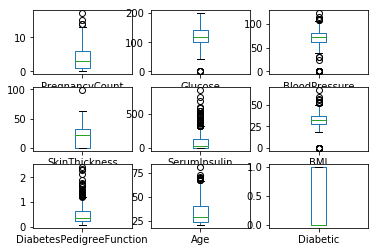

In [33]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

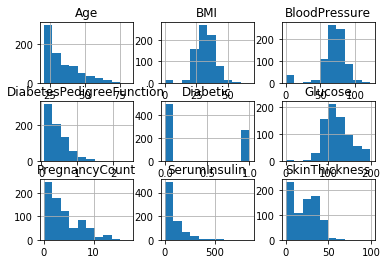

In [34]:
dataset.hist()
plt.show()

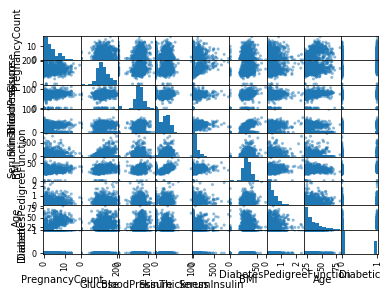

In [35]:
scatter_matrix(dataset)
plt.show()

In [36]:
X = dataset.iloc[:,:8]
Y = dataset.iloc[:,8]

In [37]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.fit(X, Y, epochs=150, batch_size=10, verbose=2)
# evaluate the model

Epoch 1/150
 - 0s - loss: 0.5800 - accuracy: 0.7201
Epoch 2/150
 - 0s - loss: 0.5832 - accuracy: 0.7109
Epoch 3/150
 - 0s - loss: 0.5821 - accuracy: 0.7148
Epoch 4/150
 - 0s - loss: 0.5867 - accuracy: 0.6992
Epoch 5/150
 - 0s - loss: 0.5843 - accuracy: 0.7083
Epoch 6/150
 - 0s - loss: 0.5813 - accuracy: 0.7135
Epoch 7/150
 - 0s - loss: 0.5803 - accuracy: 0.7188
Epoch 8/150
 - 0s - loss: 0.5826 - accuracy: 0.7148
Epoch 9/150
 - 0s - loss: 0.5803 - accuracy: 0.7227
Epoch 10/150
 - 0s - loss: 0.5826 - accuracy: 0.7135
Epoch 11/150
 - 0s - loss: 0.5815 - accuracy: 0.7148
Epoch 12/150
 - 0s - loss: 0.5819 - accuracy: 0.7122
Epoch 13/150
 - 0s - loss: 0.5822 - accuracy: 0.7135
Epoch 14/150
 - 0s - loss: 0.5876 - accuracy: 0.7005
Epoch 15/150
 - 0s - loss: 0.5823 - accuracy: 0.7122
Epoch 16/150
 - 0s - loss: 0.5779 - accuracy: 0.7201
Epoch 17/150
 - 0s - loss: 0.5795 - accuracy: 0.7135
Epoch 18/150
 - 0s - loss: 0.5872 - accuracy: 0.7057
Epoch 19/150
 - 0s - loss: 0.5772 - accuracy: 0.7227
Ep

In [43]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 129us/step

accuracy: 72.79%


In [19]:
predictions = model.predict(X)

In [21]:
labeled_predict = [int(numpy.round(x, 0)) for x in predictions]
print(labeled_predict)

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 

In [22]:
print("Labeled_predict type: ", type(labeled_predict))
print("Shape of rounded: ", len(labeled_predict))
print("Dataset type: ", type(dataset))
print("Shape of dataset: ", dataset.shape)

Rounded type:  <class 'list'>
Shape of rounded:  768
Dataset type:  <class 'pandas.core.frame.DataFrame'>
Shape of dataset:  (768, 9)


In [23]:
# Turn labeled_predict from a 'list' class into a numpy array
newlabeled = numpy.array(labeled_predict)
print("Rounded type: ", type(newlabeled))

Rounded type:  <class 'numpy.ndarray'>


In [26]:
# Create a confusion matrix with the actual values and predicted probabilities
confusion_matrix = pandas.crosstab(Y, newlabeled, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion_matrix)

Predicted    0    1  All
Actual                  
0          386  114  500
1           52  216  268
All        438  330  768
